In [119]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Load Dataset

In [120]:
winedata = pd.read_csv('winequality-red.csv') #load csv data and read the file
winedata.describe() #stats of csv data

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [121]:
winedata.info() #info of non null count and check if there's null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Exploratory Analysis

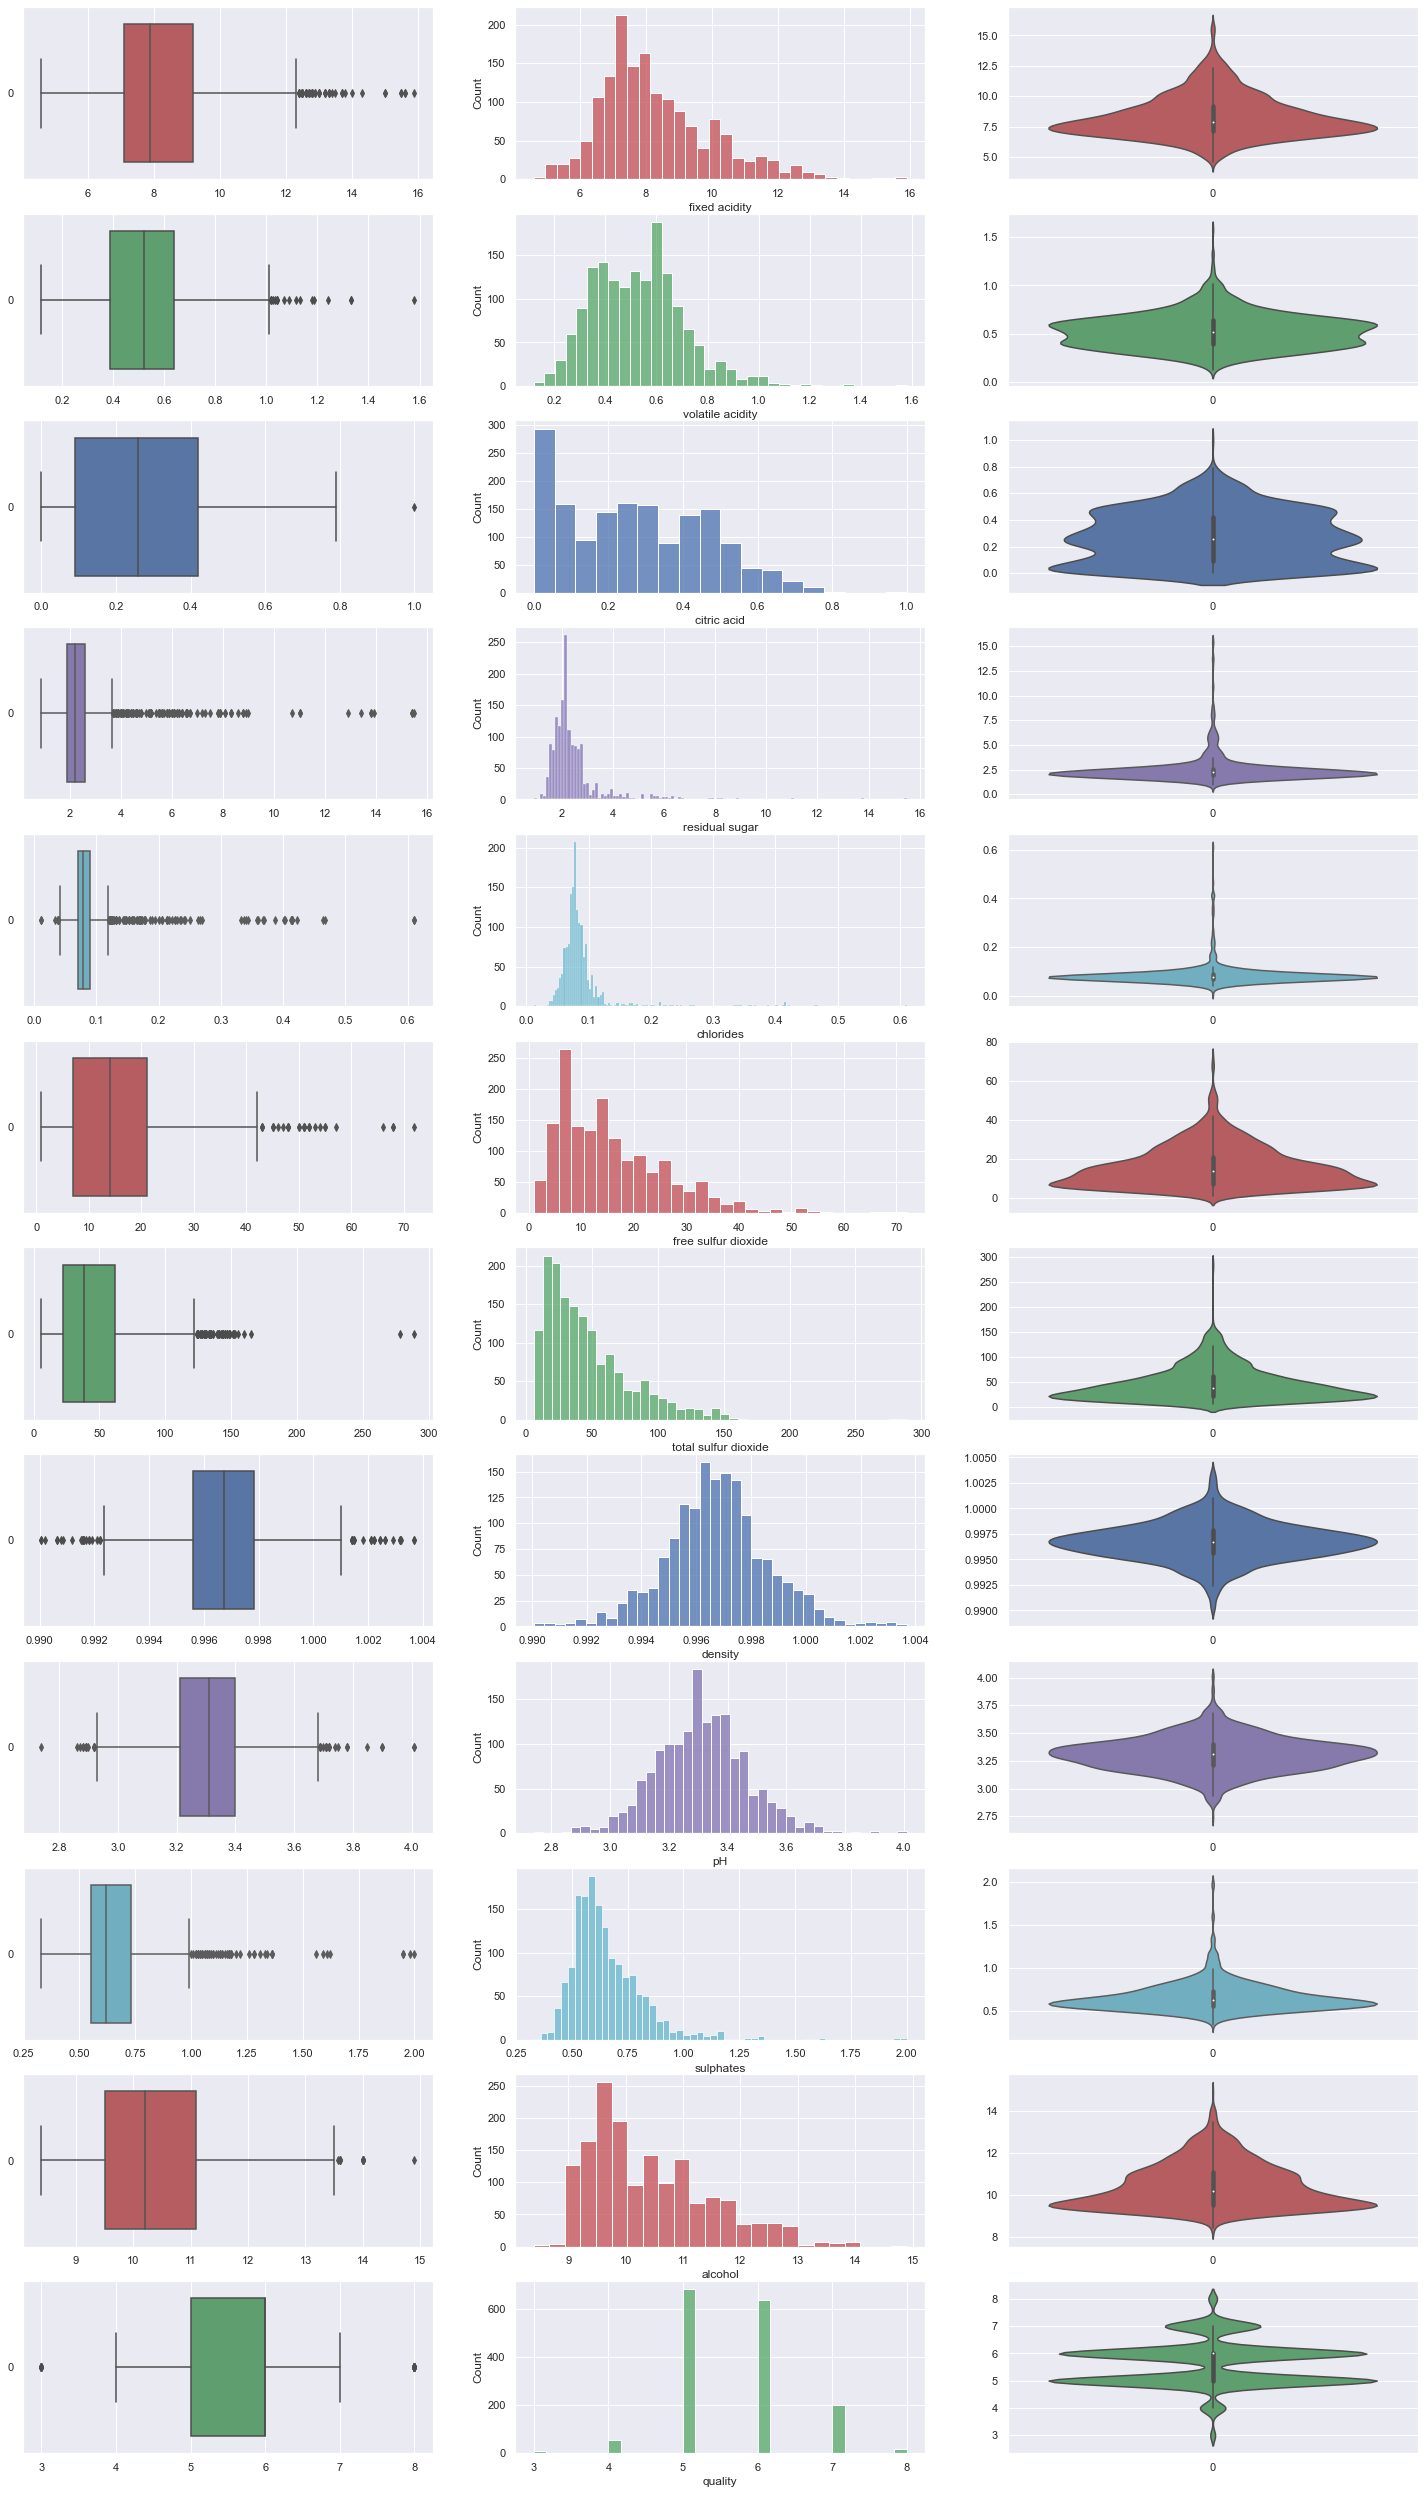

In [122]:
# Draw the distributions of all variables
f, axes = plt.subplots(12, 3, figsize=(25, 45))
colors = ["r", "g", "b", "m", "c", "r", "g", "b", "m", "c","r", "g"]

count = 0
for var in winedata:
    sb.boxplot(data=winedata[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data=winedata[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(data=winedata[var], color = colors[count], ax = axes[count,2])
    count += 1

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

<AxesSubplot:>

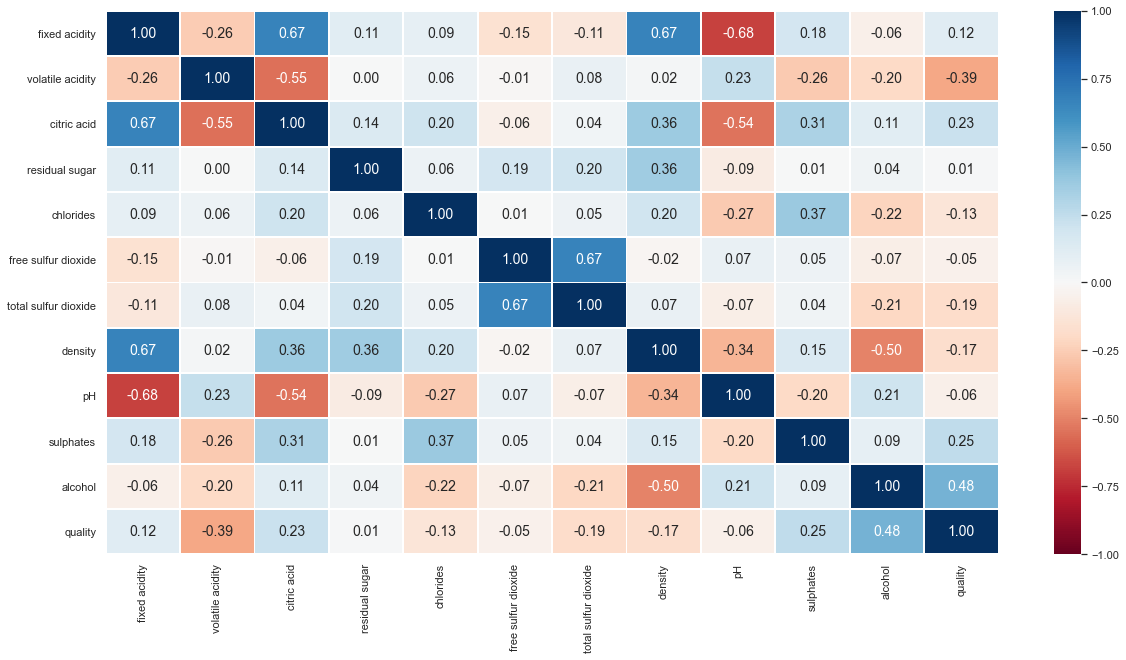

In [123]:
print(winedata.corr()) #print the correlation of variables

f, axes = plt.subplots(1, 1, figsize=(20, 10)) #correlation graph
sb.heatmap(winedata.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

In [124]:
wineFA = pd.DataFrame(winedata['fixed acidity']) # concat each variable to their own dataframe to 
wineVA = pd.DataFrame(winedata['volatile acidity'])
wineCA = pd.DataFrame(winedata['citric acid'])
wineRS = pd.DataFrame(winedata['residual sugar'])
wineC = pd.DataFrame(winedata['chlorides'])
wineFSD = pd.DataFrame(winedata['free sulfur dioxide'])
wineTSD = pd.DataFrame(winedata['total sulfur dioxide'])
wineD = pd.DataFrame(winedata['density'])
winepH = pd.DataFrame(winedata['pH'])
wineS = pd.DataFrame(winedata['sulphates'])
wineA = pd.DataFrame(winedata['alcohol'])
wineQ = pd.DataFrame(winedata['quality'])

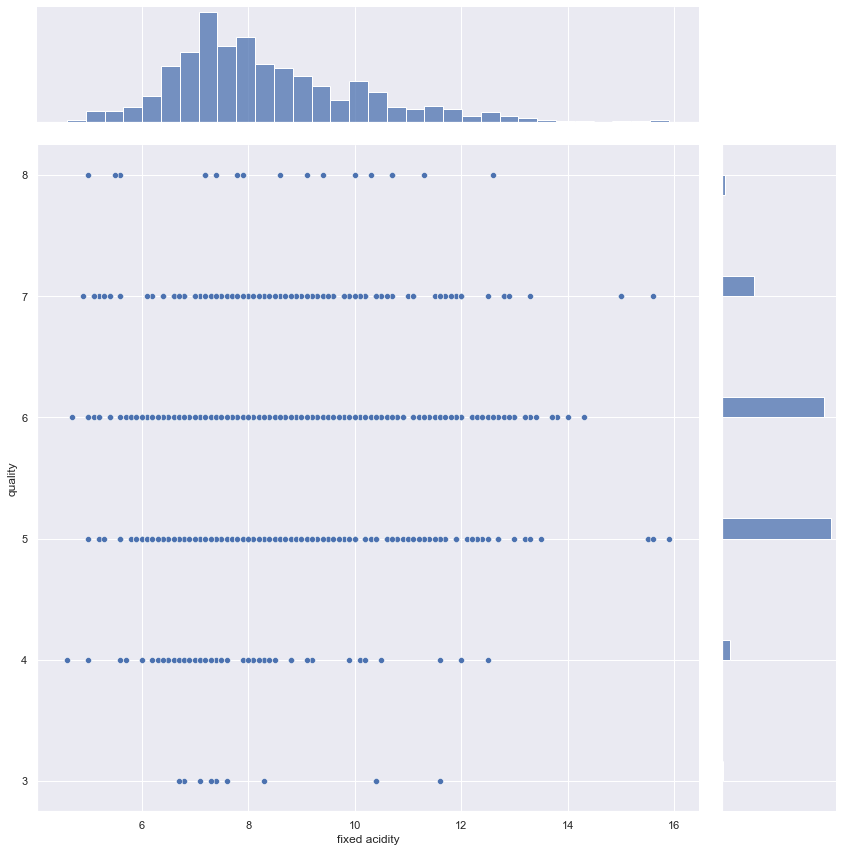

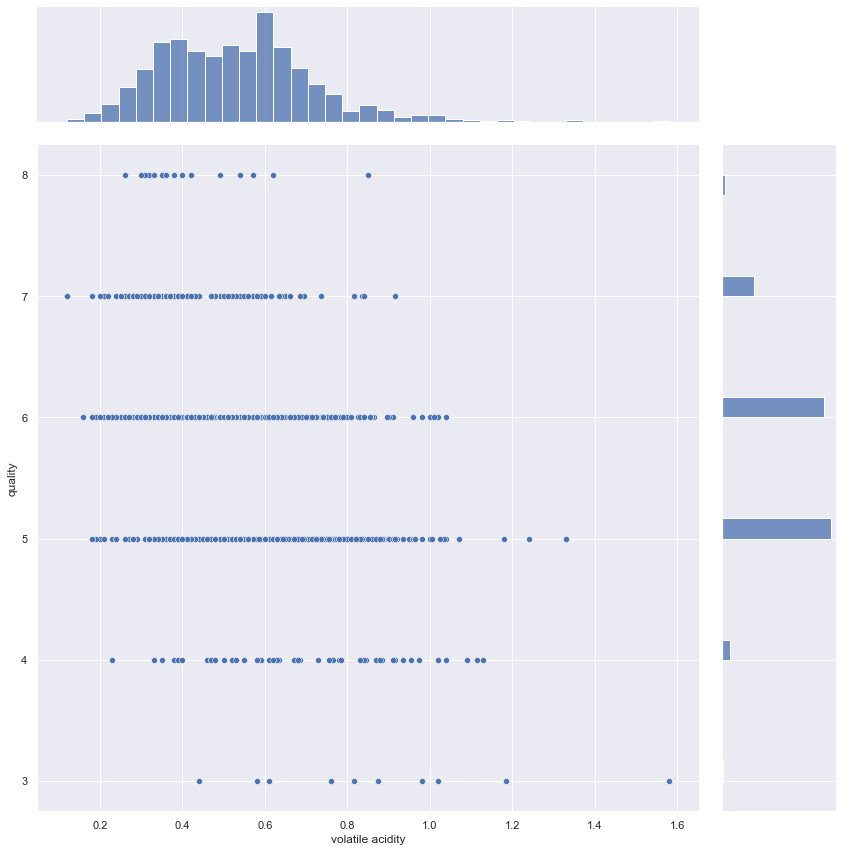

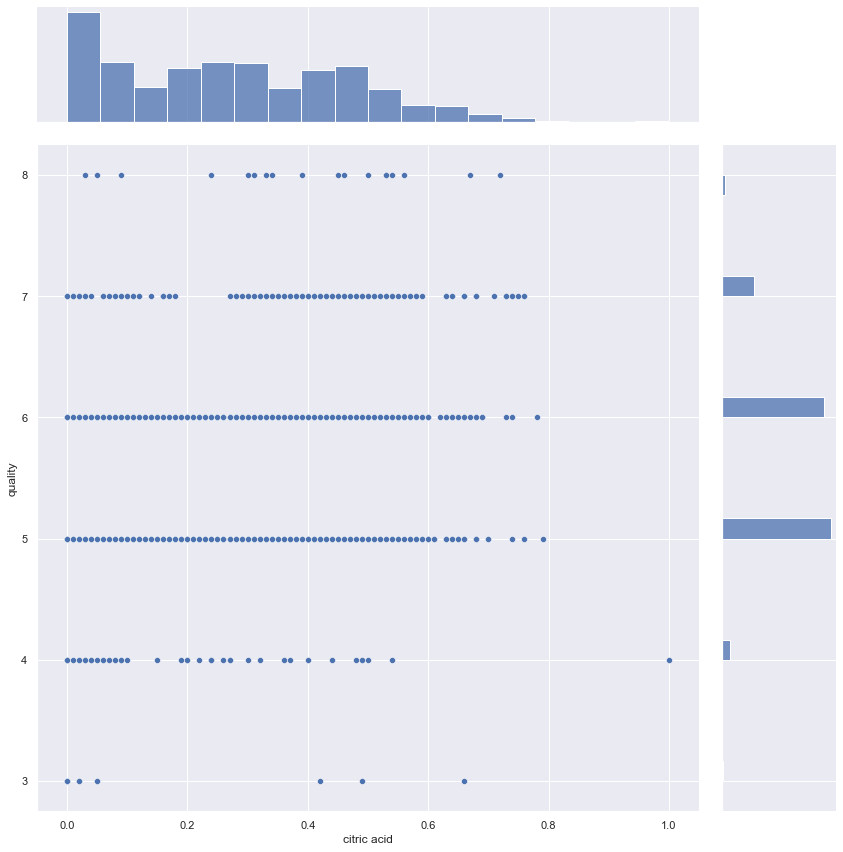

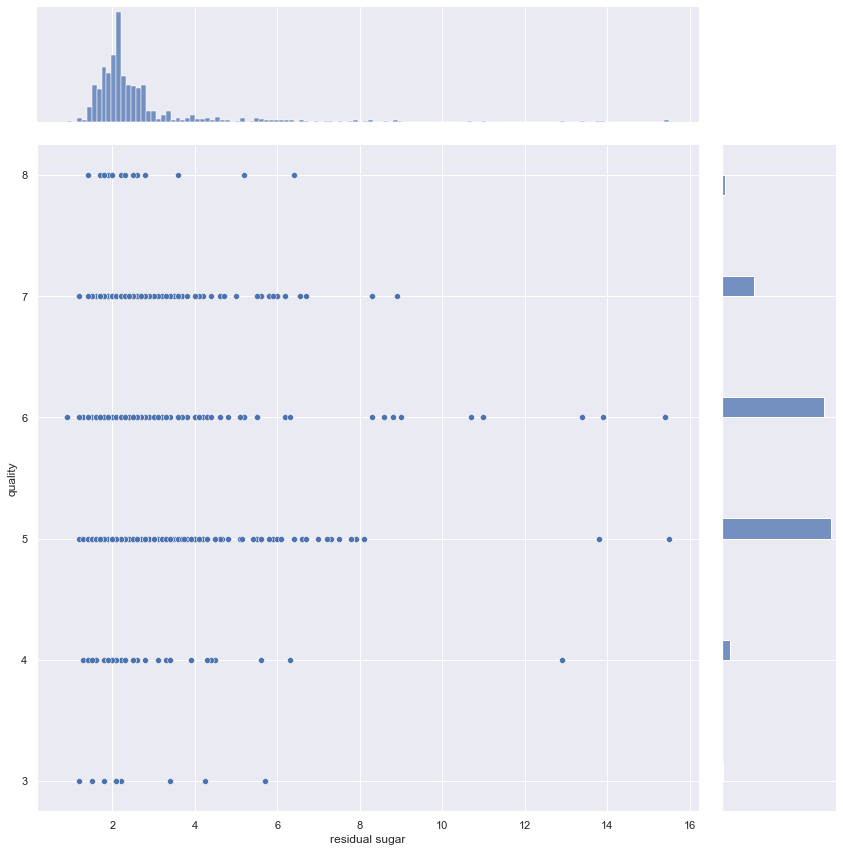

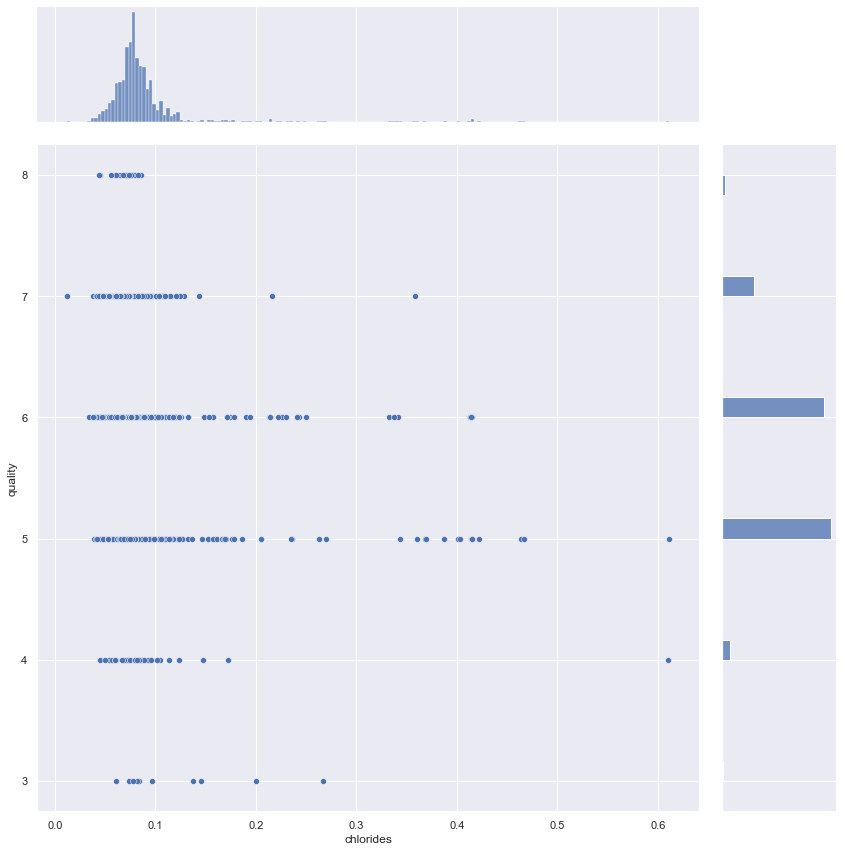

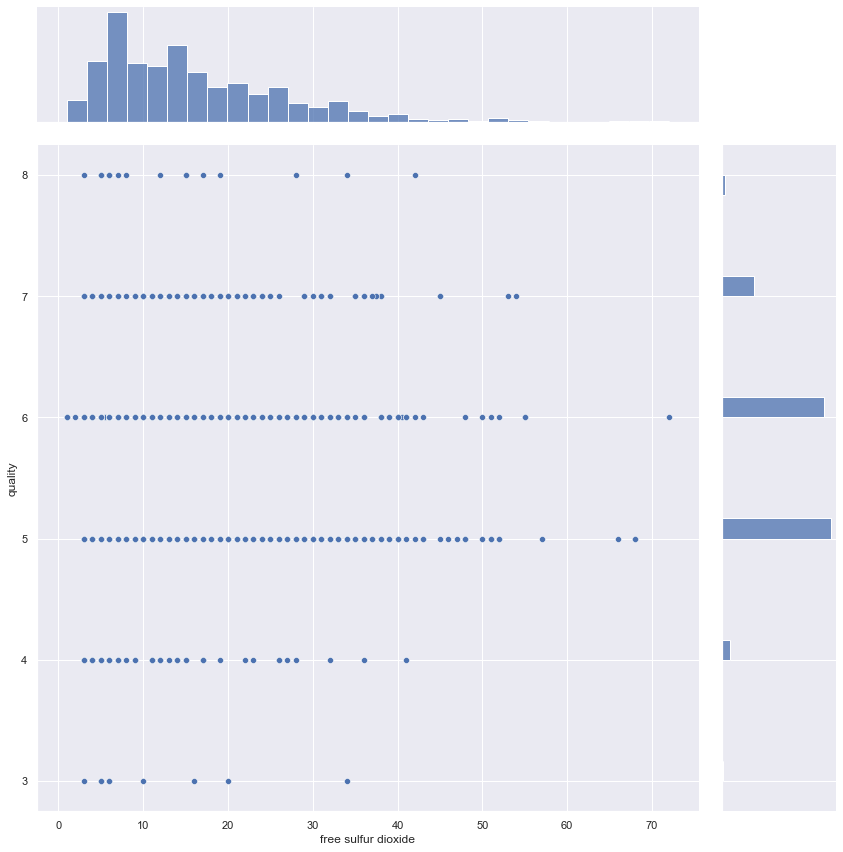

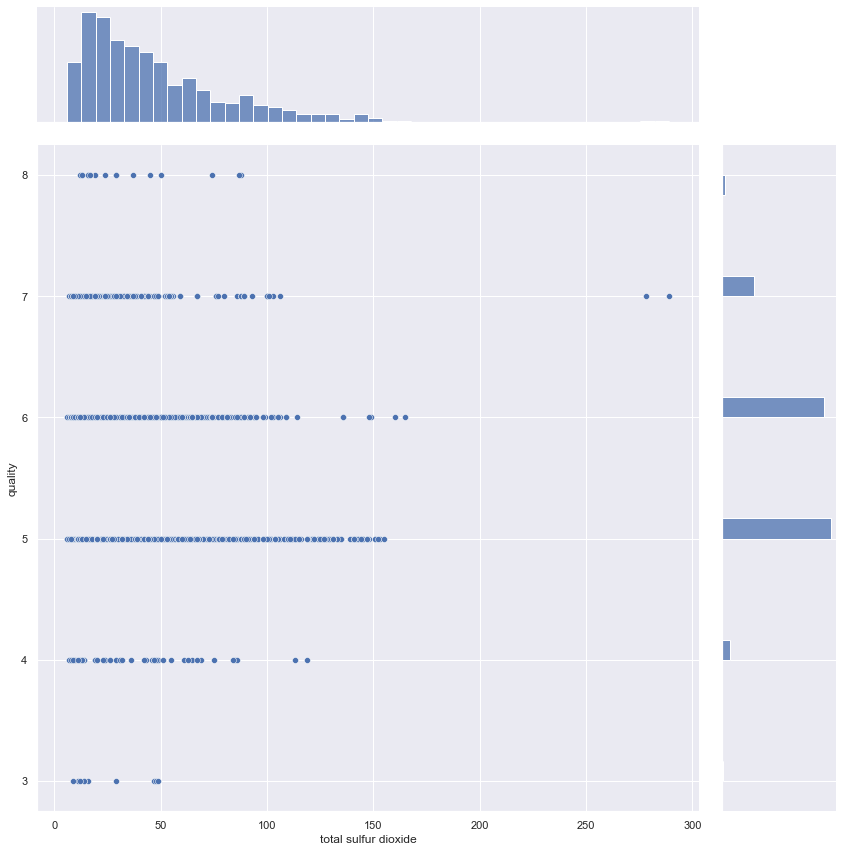

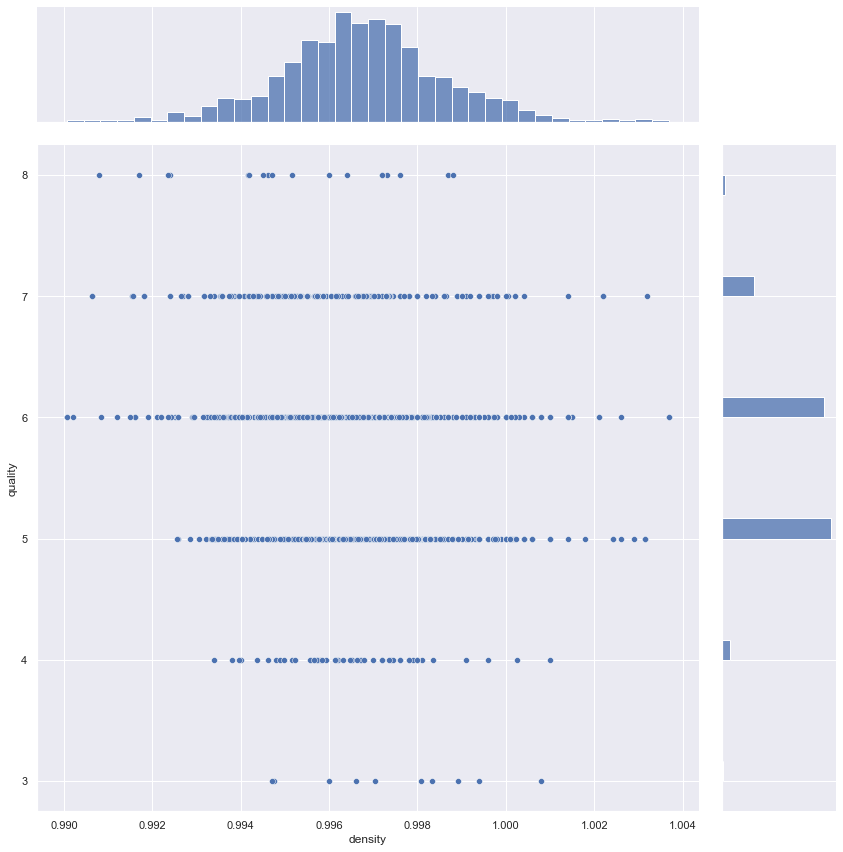

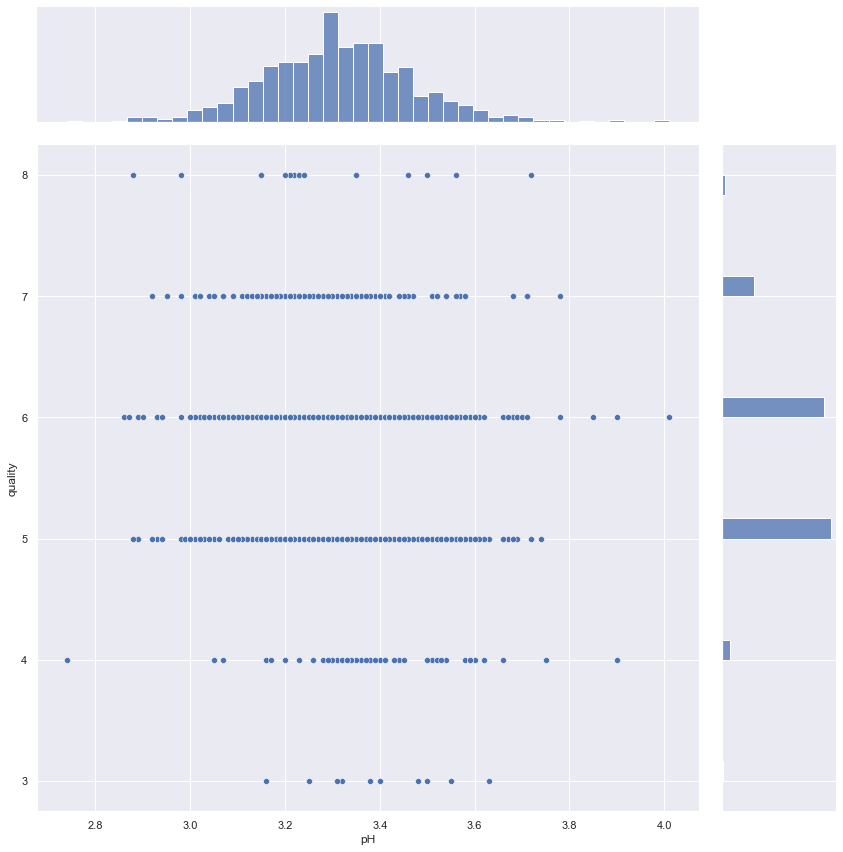

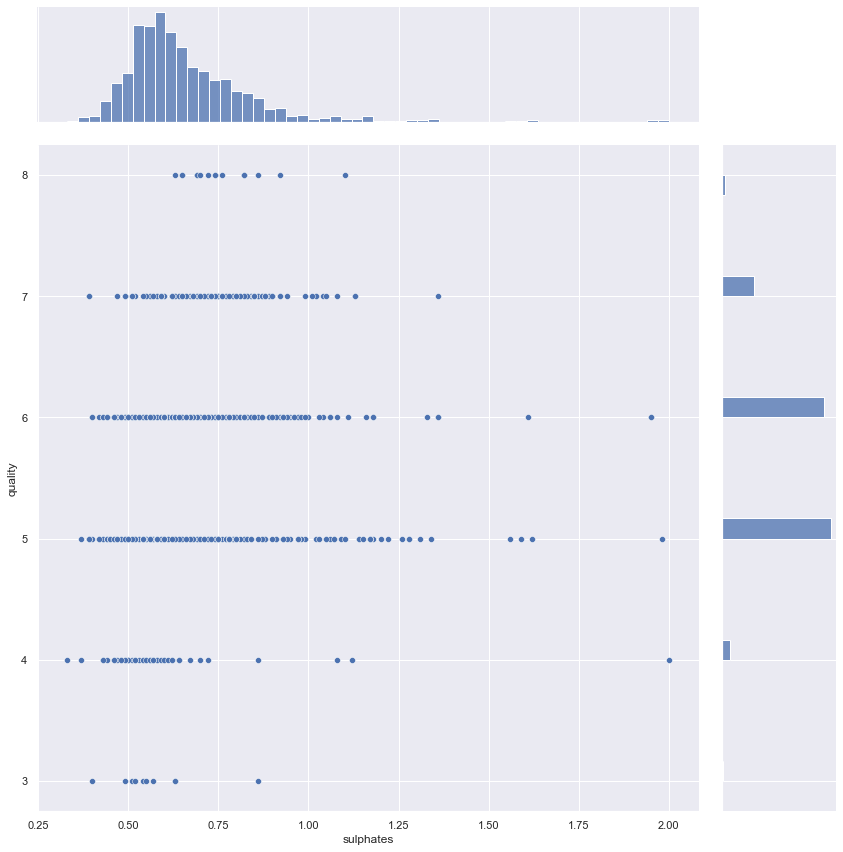

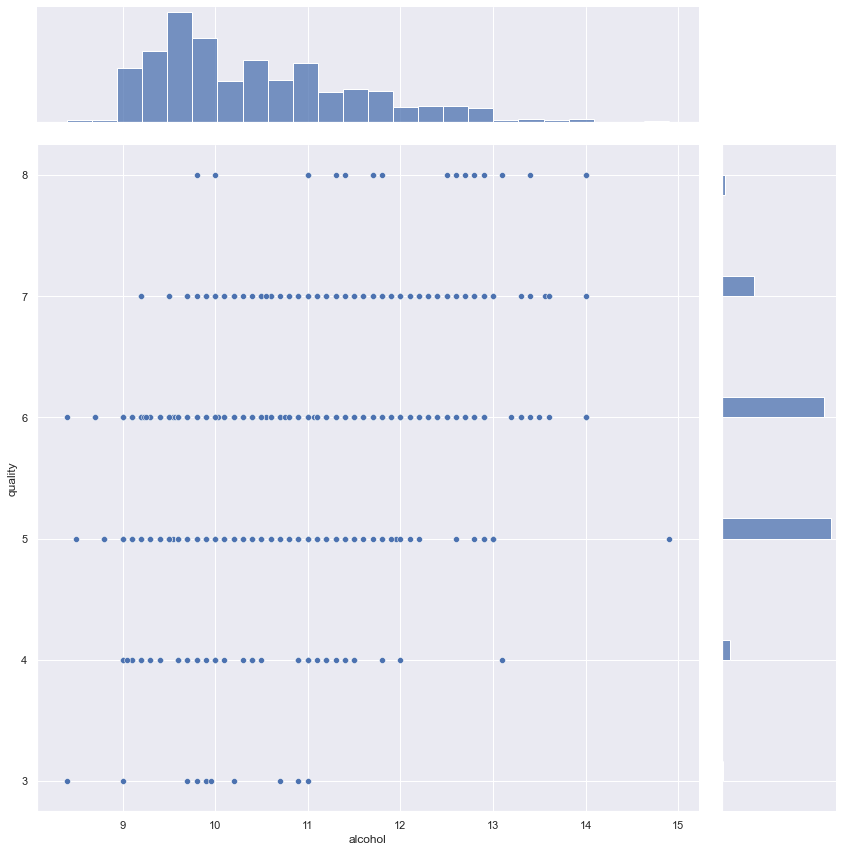

In [125]:
trainDF = pd.concat([wineFA, wineQ], axis = 1).reindex(wineFA.index) #plot joint plot of each variable
sb.jointplot(data=trainDF, x='fixed acidity', y='quality', height = 12)

trainDF = pd.concat([wineVA, wineQ], axis = 1).reindex(wineVA.index)
sb.jointplot(data=trainDF, x='volatile acidity', y='quality', height = 12)

trainDF = pd.concat([wineCA, wineQ], axis = 1).reindex(wineCA.index)
sb.jointplot(data=trainDF, x='citric acid', y='quality', height = 12)

trainDF = pd.concat([wineRS, wineQ], axis = 1).reindex(wineRS.index)
sb.jointplot(data=trainDF, x='residual sugar', y='quality', height = 12)

trainDF = pd.concat([wineC, wineQ], axis = 1).reindex(wineC.index)
sb.jointplot(data=trainDF, x='chlorides', y='quality', height = 12)

trainDF = pd.concat([wineFSD, wineQ], axis = 1).reindex(wineFSD.index)
sb.jointplot(data=trainDF, x='free sulfur dioxide', y='quality', height = 12)

trainDF = pd.concat([wineTSD, wineQ], axis = 1).reindex(wineTSD.index)
sb.jointplot(data=trainDF, x='total sulfur dioxide', y='quality', height = 12)

trainDF = pd.concat([wineD, wineQ], axis = 1).reindex(wineD.index)
sb.jointplot(data=trainDF, x='density', y='quality', height = 12)

trainDF = pd.concat([winepH, wineQ], axis = 1).reindex(winepH.index)
sb.jointplot(data=trainDF, x='pH', y='quality', height = 12)

trainDF = pd.concat([wineS, wineQ], axis = 1).reindex(wineS.index)
sb.jointplot(data=trainDF, x='sulphates', y='quality', height = 12)

trainDF = pd.concat([wineA, wineQ], axis = 1).reindex(wineA.index)
sb.jointplot(data=trainDF, x='alcohol', y='quality', height = 12)

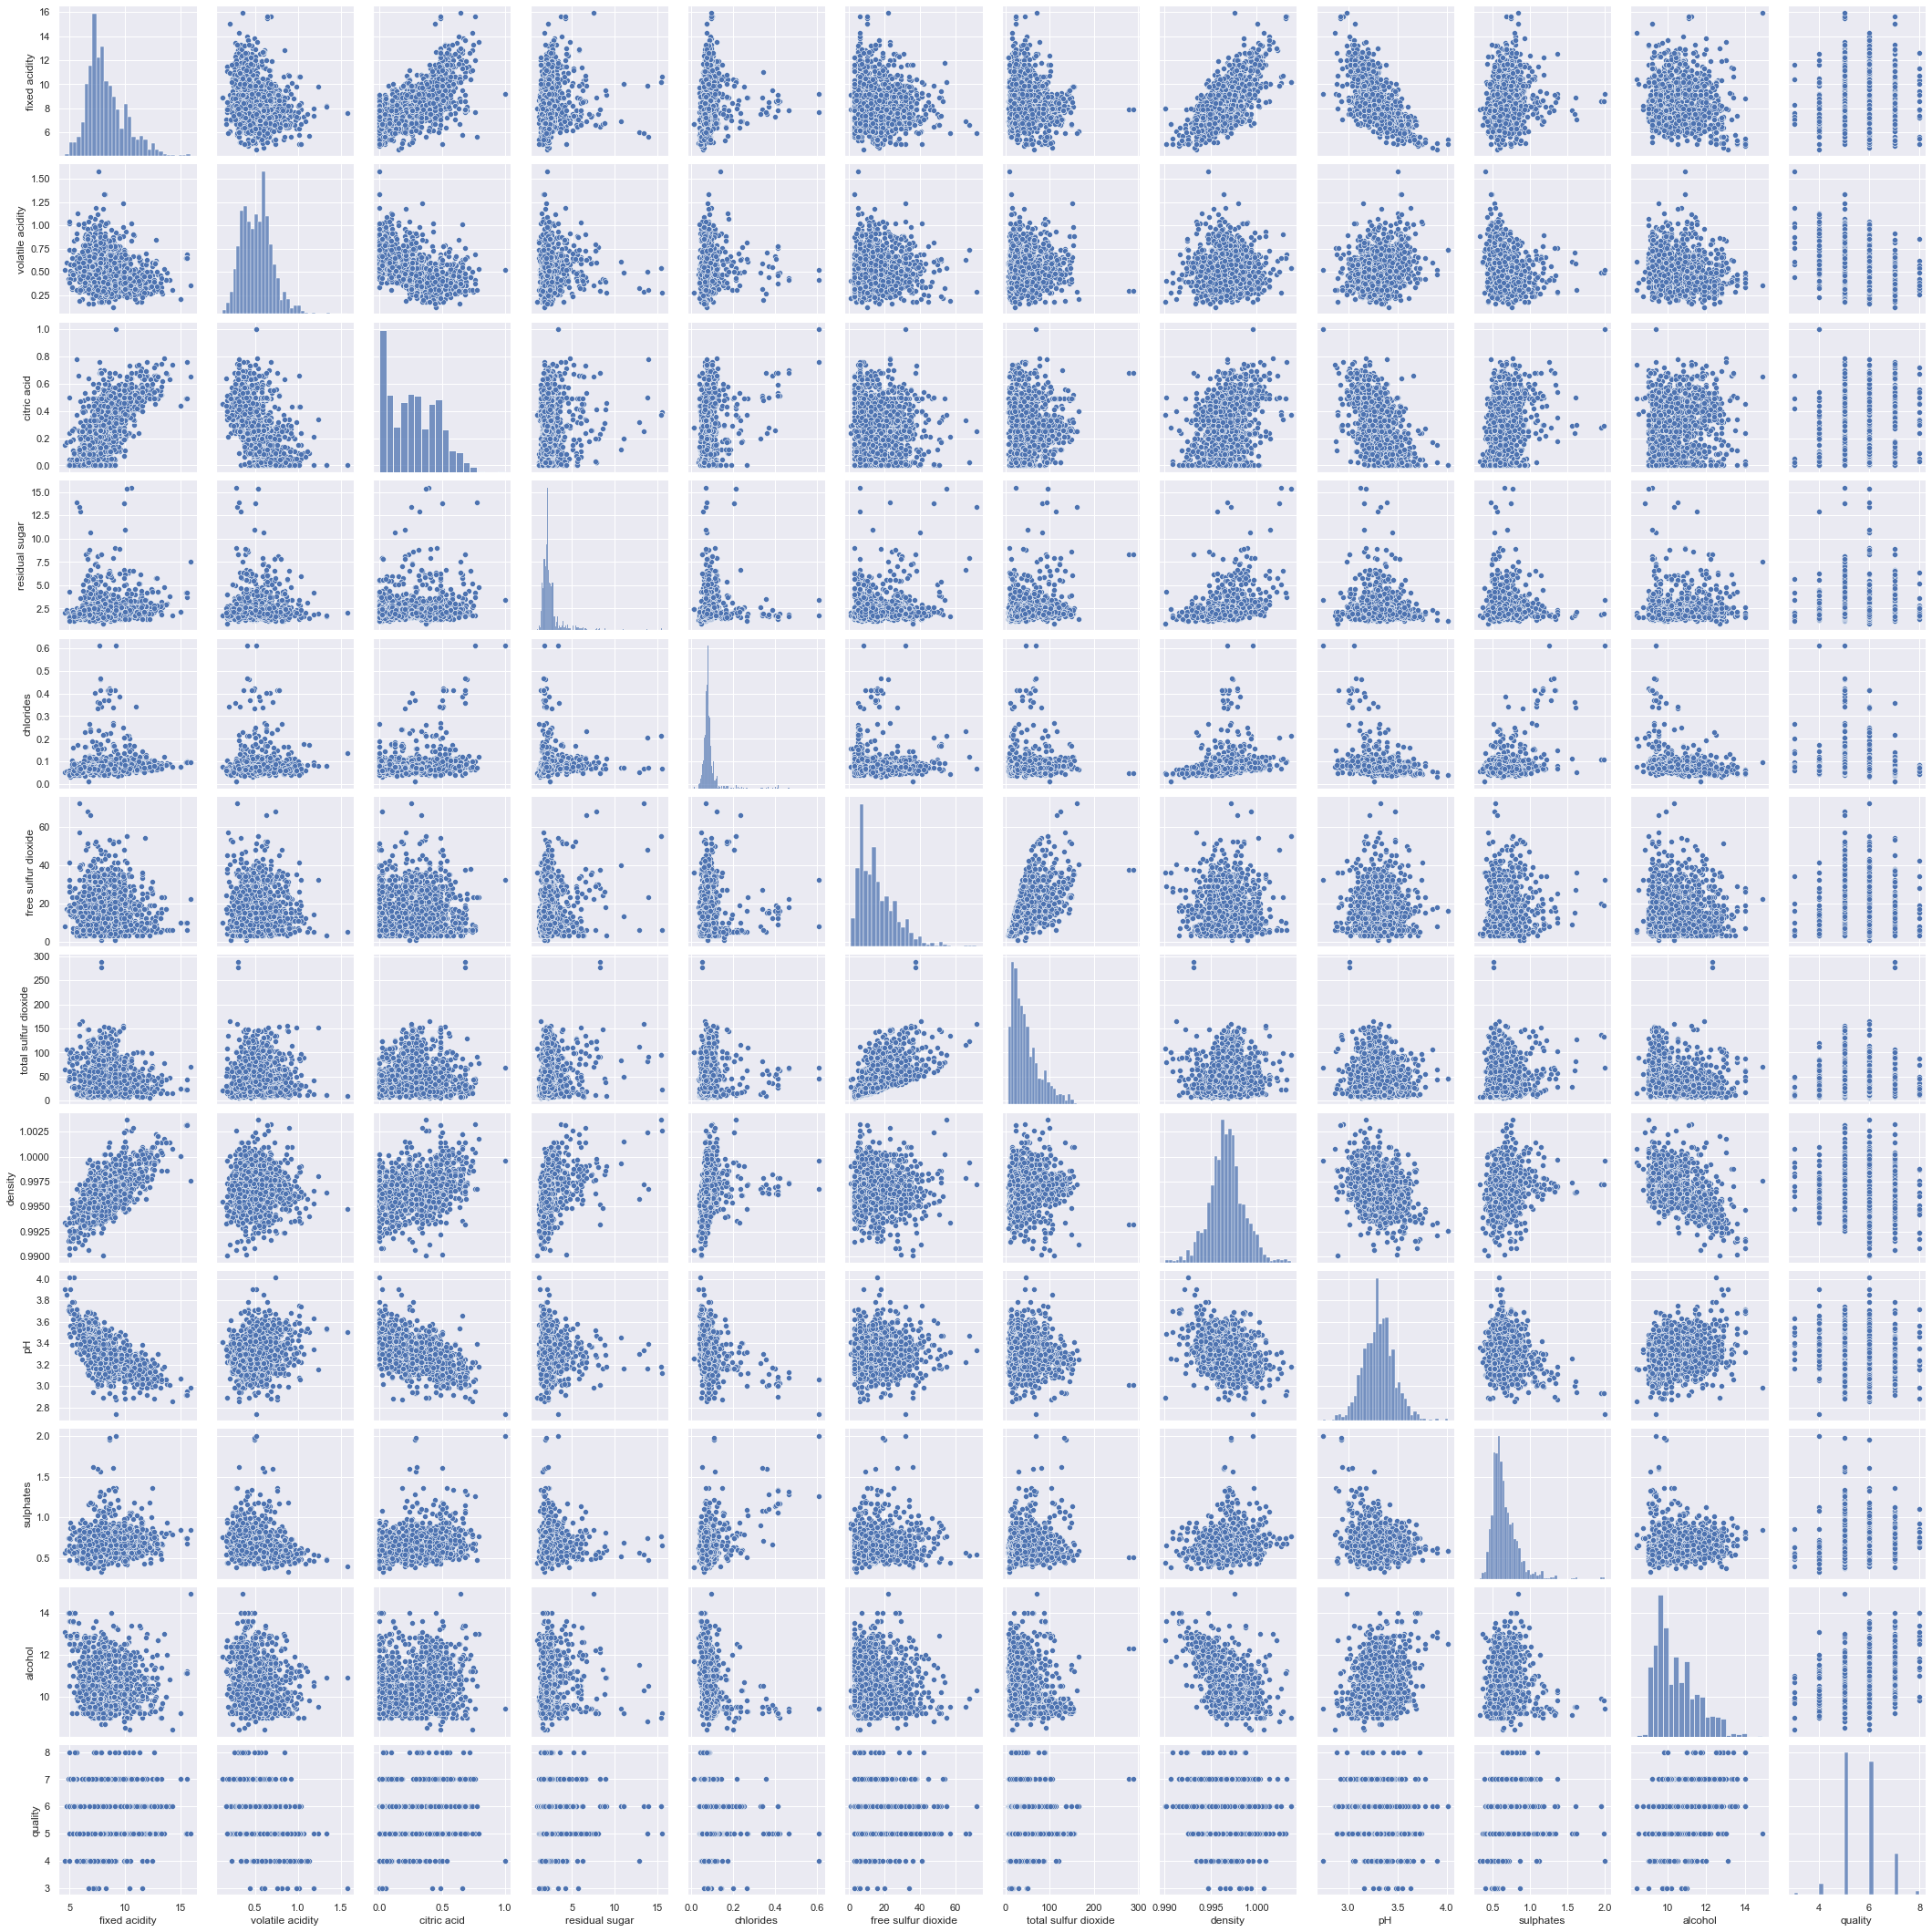

In [126]:
sb.pairplot(data = winedata) #show pair plot

# Conclusion
## Top 3 most correlated variables: alcohol, sulphates, citric acid
## Top 3 least correlated variables: volatile acidity, total sulfur dioxide, density
## 3 variables close to 0 correlation: residual sugar, free sulfur dioxide, pH

# Decision Tree

In [127]:
from sklearn.tree import DecisionTreeClassifier #import decision tree classifier model

dectree = DecisionTreeClassifier(max_depth = 2)

In [231]:
grade = [] #Quality is a categorical variable but is currently numeric data. Convert quality to real categorical variable
for i in winedata['quality']: 
    if i > 5.5:
        i = 1
        grade.append(i)
    else:
        i = 0
        grade.append(i)
winedata['grade'] = grade #append grade data to winedata

In [232]:
winedata['grade'] = winedata['grade'].astype('category') #convert grade dtype to category
winedata.dtypes #check if grade dtype has been converted to category

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
grade                   category
dtype: object

In [233]:
winedata_train = pd.DataFrame(winedata[:1200]) #split data with 75% to train and 25% to test
winedata_test  = pd.DataFrame(winedata[-400:])

print("Train Set :", winedata_train.shape)
print("Test Set  :", winedata_test.shape)

Train Set : (1200, 13)
Test Set  : (400, 13)


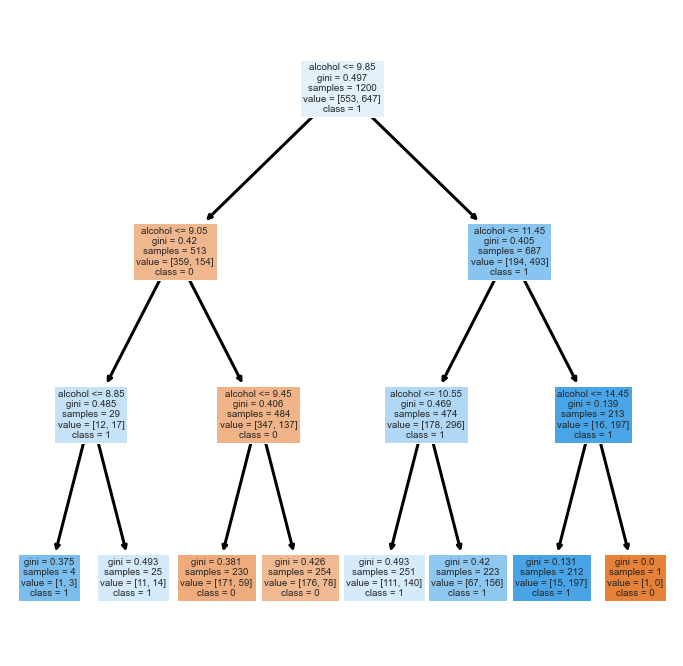

In [234]:
y_train = pd.DataFrame(winedata_train['grade']) #single variate classification
X_train = pd.DataFrame(winedata_train['alcohol'])

dectree.fit(X_train, y_train)

from sklearn.tree import plot_tree #decision tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.715


<AxesSubplot:>

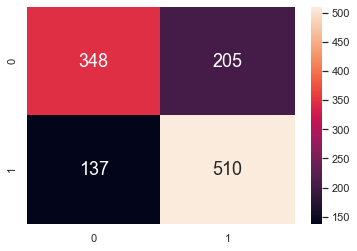

In [235]:
y_train_pred = dectree.predict(X_train)

print("Classification Accuracy \t:", dectree.score(X_train, y_train)) #print accuracy

from sklearn.metrics import confusion_matrix #confusion matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.66


<AxesSubplot:>

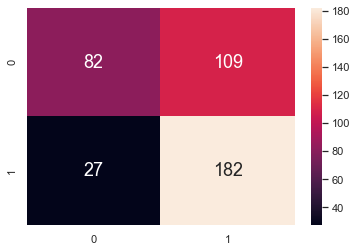

In [236]:
y_test = pd.DataFrame(winedata_test['grade']) #single variate classification
X_test = pd.DataFrame(winedata_test['alcohol'])

y_test_pred = dectree.predict(X_test)

print("Classification Accuracy \t:", dectree.score(X_test, y_test)) #accuracy

from sklearn.metrics import confusion_matrix #confusion matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

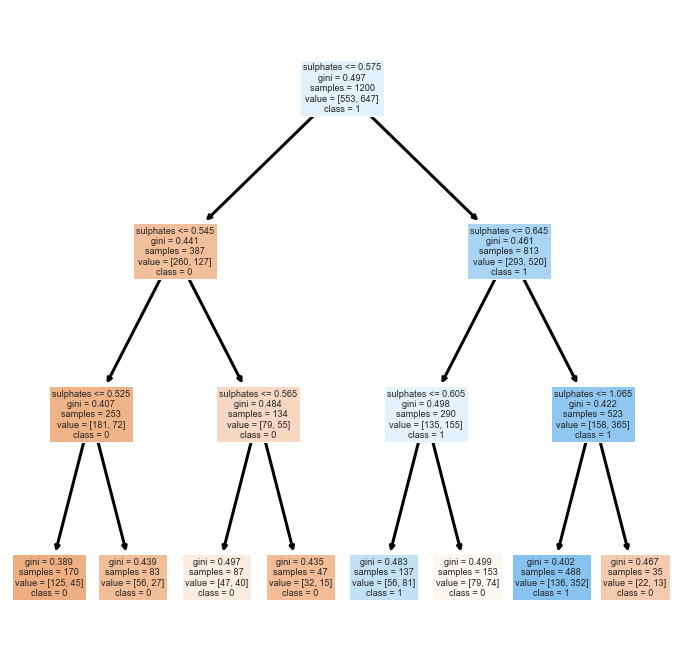

In [237]:
y_train = pd.DataFrame(winedata_train['grade']) #single variate classification
X_train = pd.DataFrame(winedata_train['sulphates'])

dectree.fit(X_train, y_train)

from sklearn.tree import plot_tree # decision tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.6616666666666666


<AxesSubplot:>

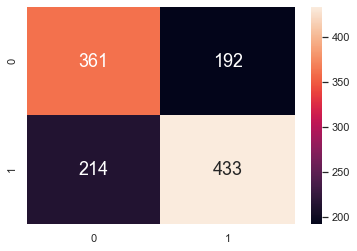

In [238]:
y_train_pred = dectree.predict(X_train) 

print("Classification Accuracy \t:", dectree.score(X_train, y_train)) #accuracy

from sklearn.metrics import confusion_matrix #confusion matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.665


<AxesSubplot:>

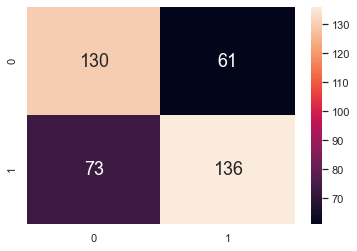

In [239]:
y_test = pd.DataFrame(winedata_test['grade']) #single variate classification
X_test = pd.DataFrame(winedata_test['sulphates'])

y_test_pred = dectree.predict(X_test)

print("Classification Accuracy \t:", dectree.score(X_test, y_test)) #accuracy

from sklearn.metrics import confusion_matrix #confusion matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

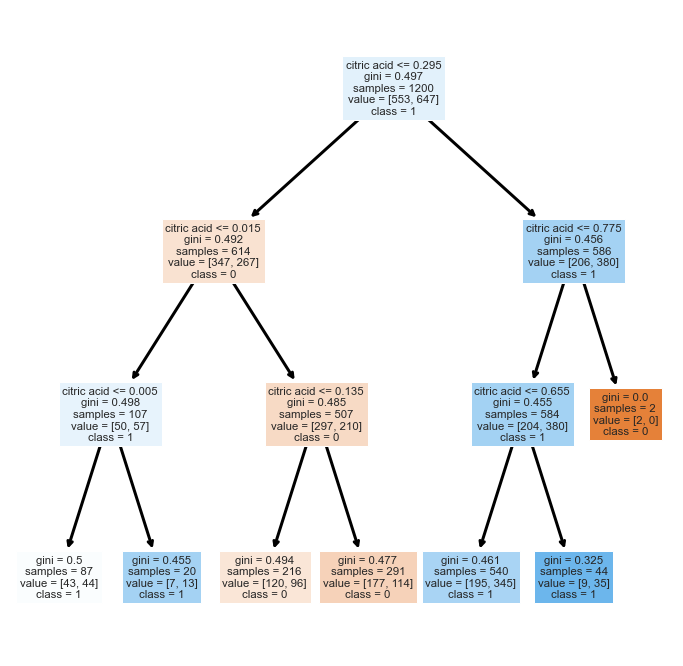

In [240]:
y_train = pd.DataFrame(winedata_train['grade']) #single variate classification
X_train = pd.DataFrame(winedata_train['citric acid'])

dectree.fit(X_train, y_train)

from sklearn.tree import plot_tree #decision tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.6133333333333333


<AxesSubplot:>

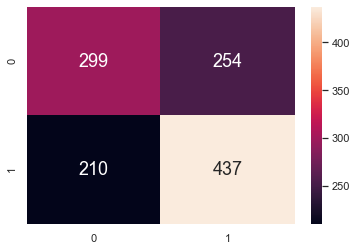

In [241]:
y_train_pred = dectree.predict(X_train)

print("Classification Accuracy \t:", dectree.score(X_train, y_train)) #accuracy

from sklearn.metrics import confusion_matrix #confusion matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.5575


<AxesSubplot:>

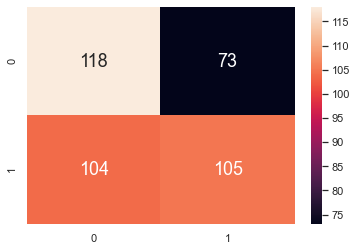

In [242]:
y_test = pd.DataFrame(winedata_test['grade']) #single variate classification
X_test = pd.DataFrame(winedata_test['citric acid'])

y_test_pred = dectree.predict(X_test)

print("Classification Accuracy \t:", dectree.score(X_test, y_test))

from sklearn.metrics import confusion_matrix #confusion matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}) 

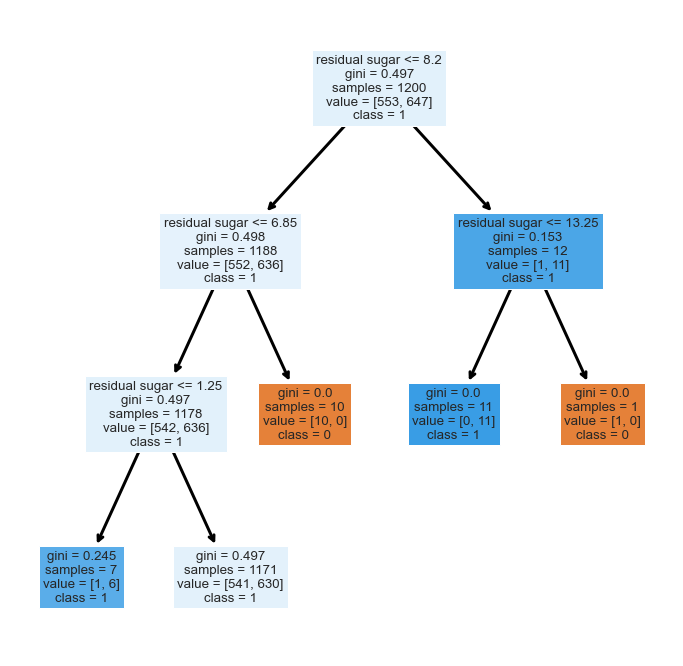

In [243]:
y_train = pd.DataFrame(winedata_train['grade']) #single variate classification
X_train = pd.DataFrame(winedata_train['residual sugar'])

dectree.fit(X_train, y_train)

from sklearn.tree import plot_tree #decision tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.5483333333333333


<AxesSubplot:>

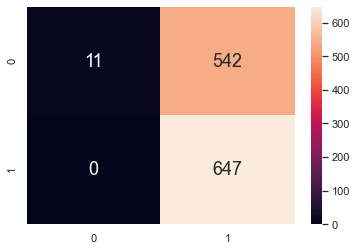

In [244]:
y_train_pred = dectree.predict(X_train)

print("Classification Accuracy \t:", dectree.score(X_train, y_train)) #accuracy

from sklearn.metrics import confusion_matrix #confusion matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.52


<AxesSubplot:>

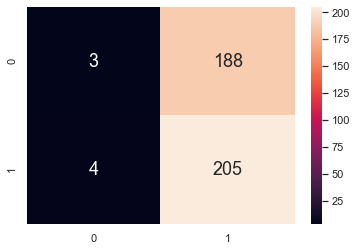

In [245]:
y_test = pd.DataFrame(winedata_test['grade']) #single variate classification
X_test = pd.DataFrame(winedata_test['residual sugar'])

y_test_pred = dectree.predict(X_test)

print("Classification Accuracy \t:", dectree.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}) 

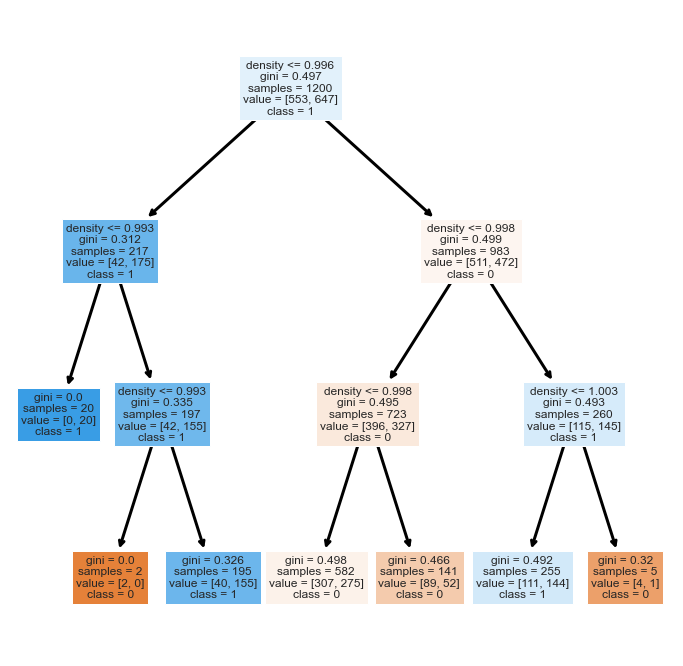

In [246]:
y_train = pd.DataFrame(winedata_train['grade']) #single variate classification
X_train = pd.DataFrame(winedata_train['density'])

dectree.fit(X_train, y_train)

from sklearn.tree import plot_tree #decision tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.6008333333333333


<AxesSubplot:>

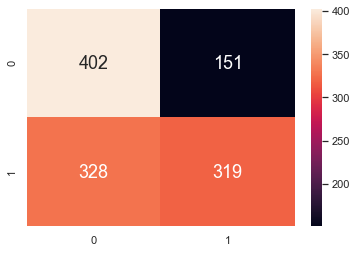

In [247]:
y_train_pred = dectree.predict(X_train)

print("Classification Accuracy \t:", dectree.score(X_train, y_train)) #accuracy

from sklearn.metrics import confusion_matrix #confusion matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.595


<AxesSubplot:>

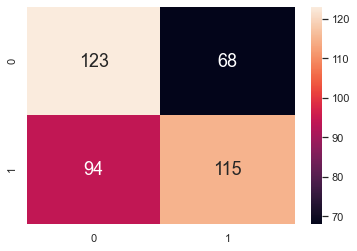

In [248]:
y_test = pd.DataFrame(winedata_test['grade']) #single variate classification
X_test = pd.DataFrame(winedata_test['density'])

y_test_pred = dectree.predict(X_test)

print("Classification Accuracy \t:", dectree.score(X_test, y_test))

from sklearn.metrics import confusion_matrix #confusion matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}) 

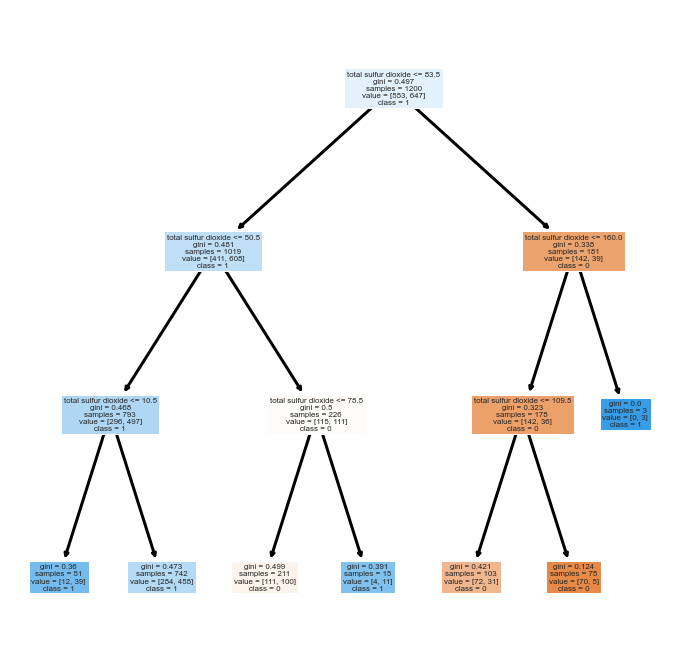

In [249]:
y_train = pd.DataFrame(winedata_train['grade'])
X_train = pd.DataFrame(winedata_train['total sulfur dioxide'])

dectree.fit(X_train, y_train)

from sklearn.tree import plot_tree #decision tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.6366666666666667


<AxesSubplot:>

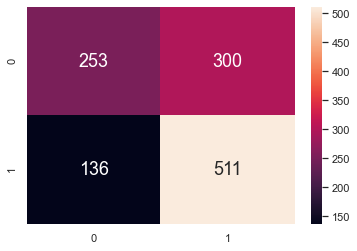

In [250]:
y_train_pred = dectree.predict(X_train)

print("Classification Accuracy \t:", dectree.score(X_train, y_train)) #accuracy

from sklearn.metrics import confusion_matrix #confusion matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.5575


<AxesSubplot:>

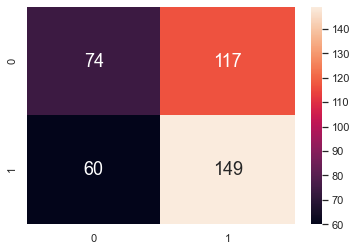

In [251]:
y_test = pd.DataFrame(winedata_test['grade']) #single variate classification
X_test = pd.DataFrame(winedata_test['total sulfur dioxide'])

y_test_pred = dectree.predict(X_test)

print("Classification Accuracy \t:", dectree.score(X_test, y_test))

from sklearn.metrics import confusion_matrix #confusion matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

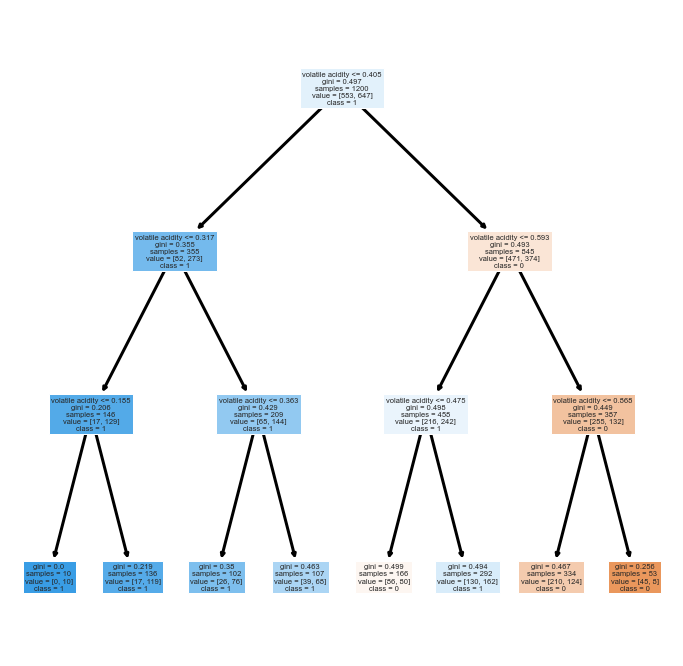

In [252]:
y_train = pd.DataFrame(winedata_train['grade']) #single variate classification
X_train = pd.DataFrame(winedata_train['volatile acidity'])

dectree.fit(X_train, y_train)

from sklearn.tree import plot_tree #decision tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.6466666666666666


<AxesSubplot:>

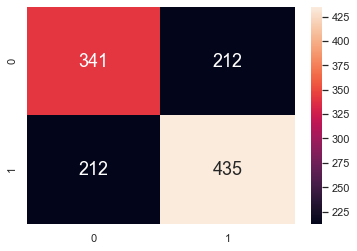

In [253]:
y_train_pred = dectree.predict(X_train)

print("Classification Accuracy \t:", dectree.score(X_train, y_train)) #accuracy

from sklearn.metrics import confusion_matrix #confusion matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.5925


<AxesSubplot:>

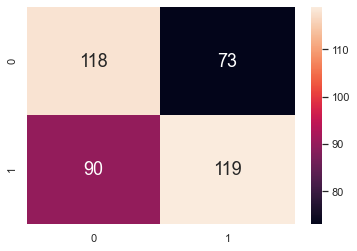

In [254]:
y_test = pd.DataFrame(winedata_test['grade'])
X_test = pd.DataFrame(winedata_test['volatile acidity'])

y_test_pred = dectree.predict(X_test)

print("Classification Accuracy \t:", dectree.score(X_test, y_test)) #accuracy

from sklearn.metrics import confusion_matrix #confusion matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}) 

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7297748123436196

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.76



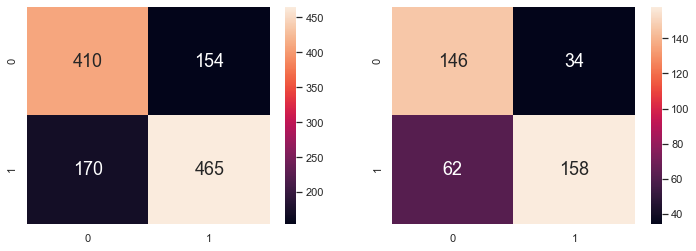

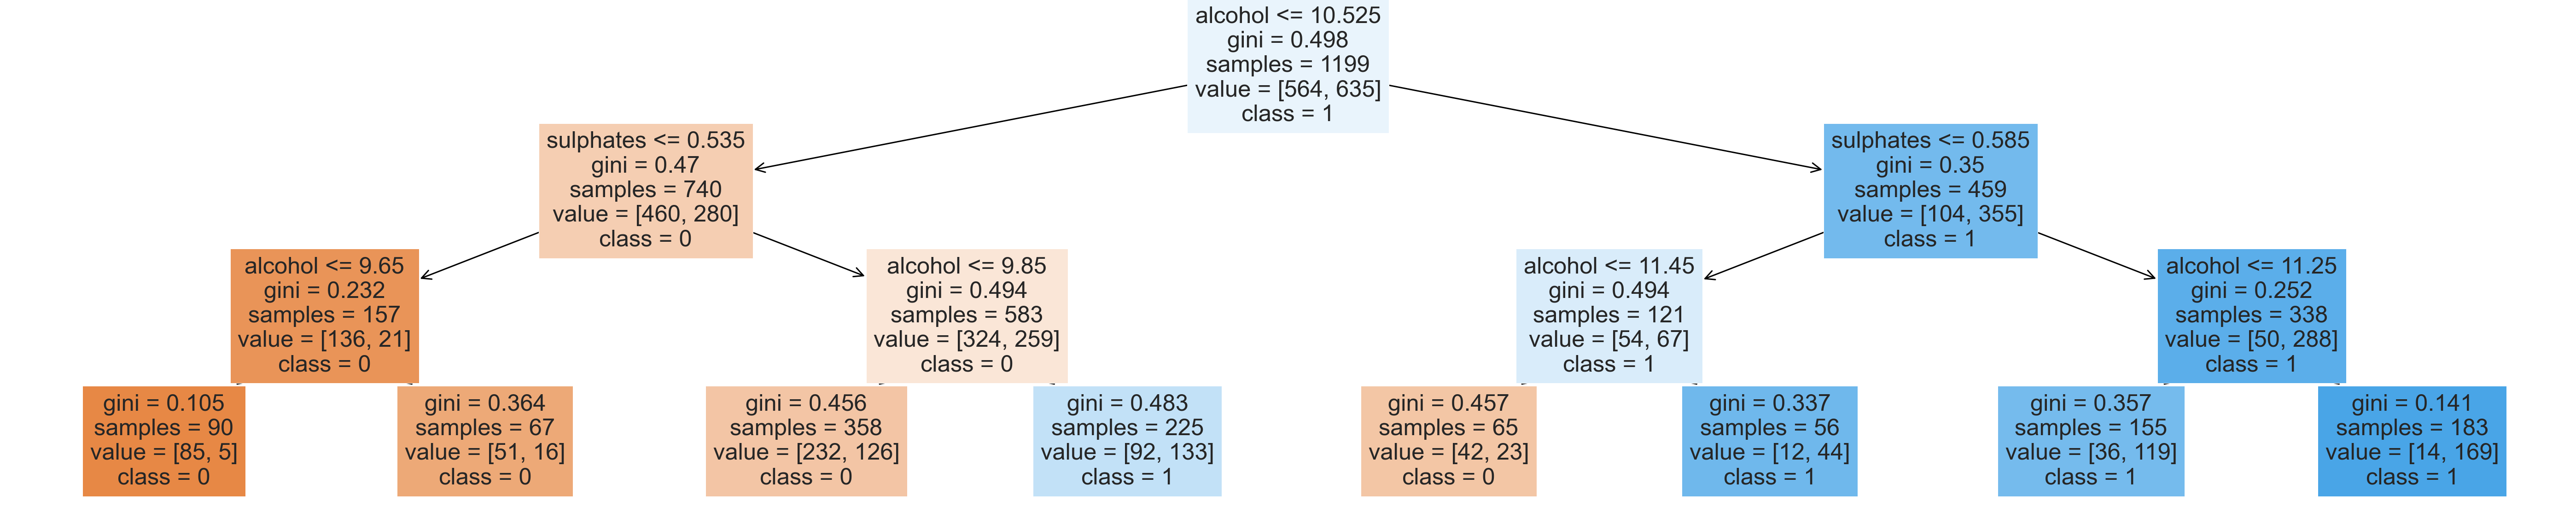

In [255]:
y = pd.DataFrame(winedata['grade']) #multi variate classifcation
X = pd.DataFrame(winedata[['alcohol', 'sulphates', 'citric acid']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 400)

dectree = DecisionTreeClassifier(max_depth = 3)  
dectree.fit(X_train, y_train)                    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train)) #accuracy
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test)) #accuracy
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4)) # plot confusion matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.tree import plot_tree #plot decision tree
fig, ax = plt.subplots(figsize=(100, 20))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6747289407839867

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6475



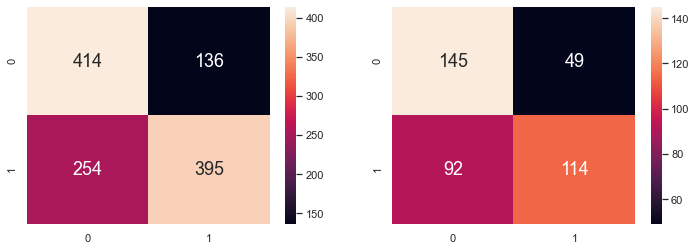

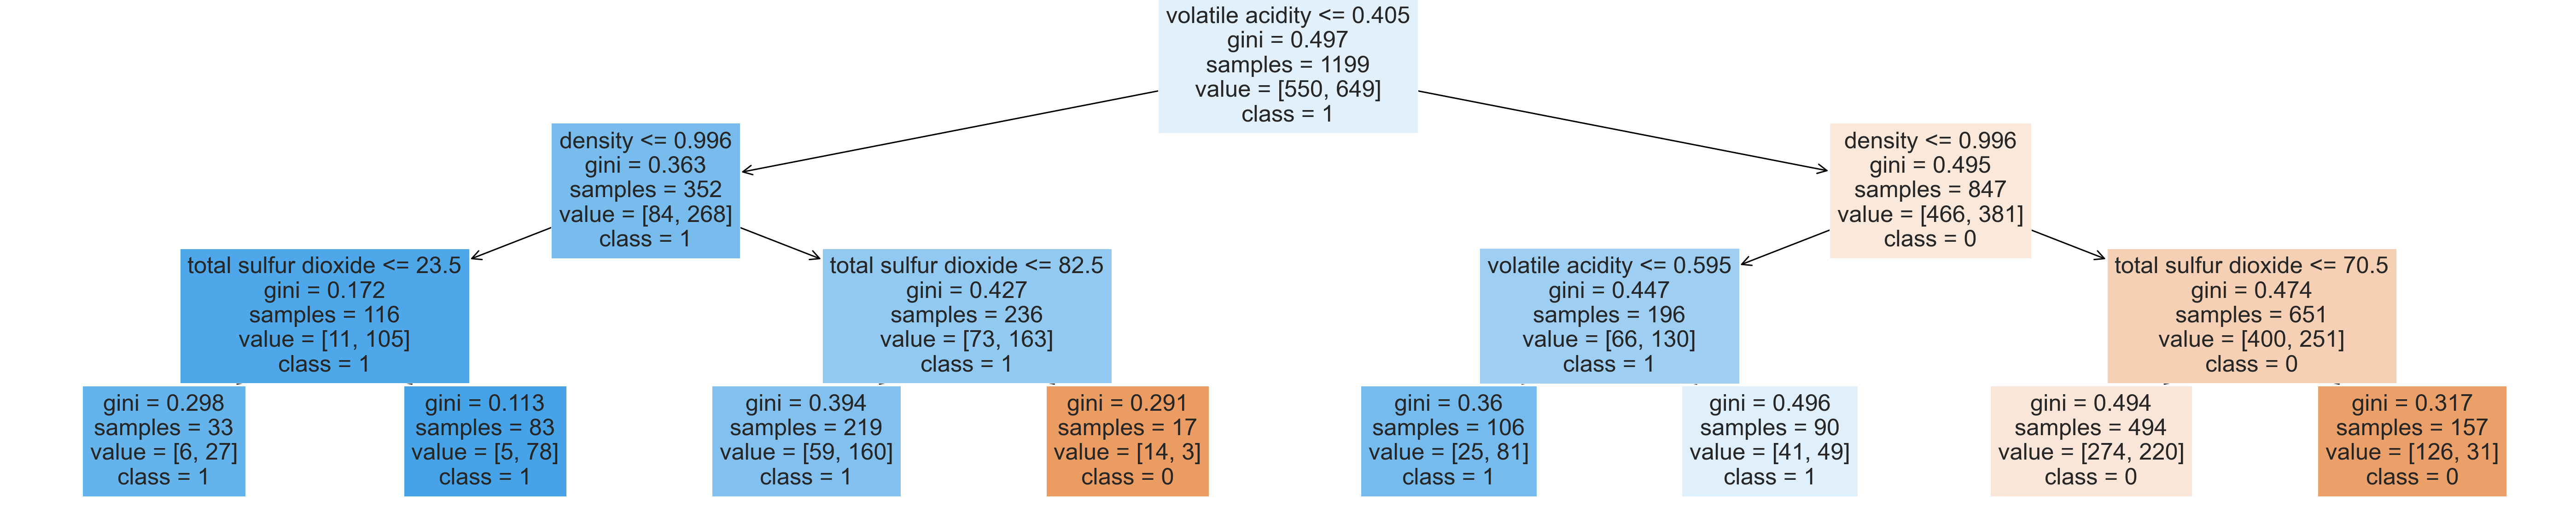

In [256]:
y = pd.DataFrame(winedata['grade']) 
X = pd.DataFrame(winedata[['density', 'total sulfur dioxide', 'volatile acidity']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 400)

dectree = DecisionTreeClassifier(max_depth = 3)  
dectree.fit(X_train, y_train)                    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(100, 20))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5946622185154296

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6



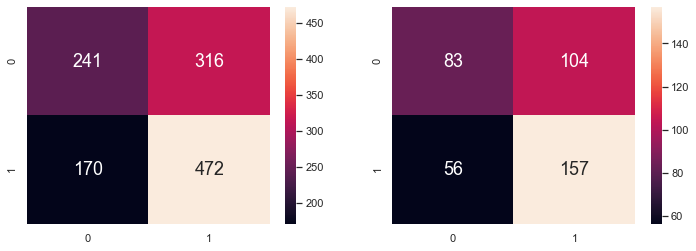

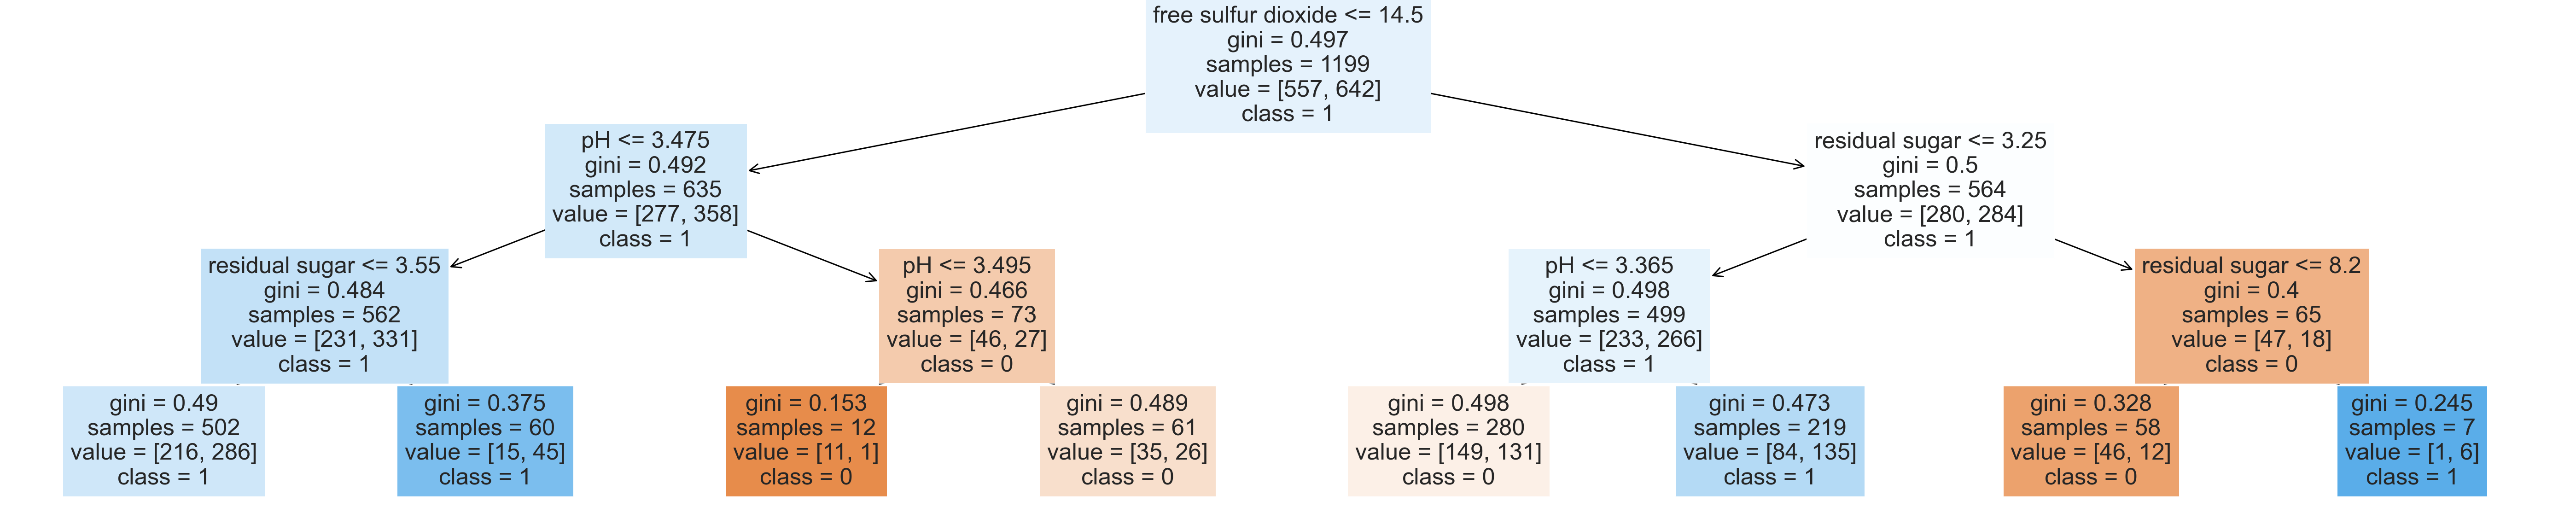

In [259]:
y = pd.DataFrame(winedata['grade']) 
X = pd.DataFrame(winedata[['residual sugar', 'free sulfur dioxide', 'pH']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 400)

dectree = DecisionTreeClassifier(max_depth = 3)  
dectree.fit(X_train, y_train)                    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(100, 20))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.749791492910759

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.71



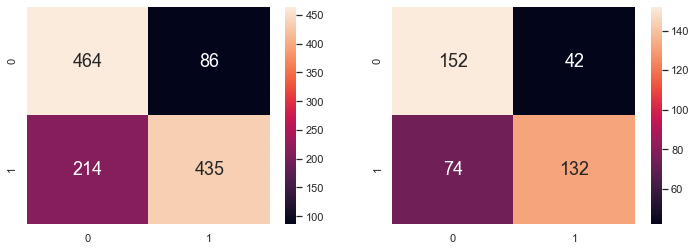

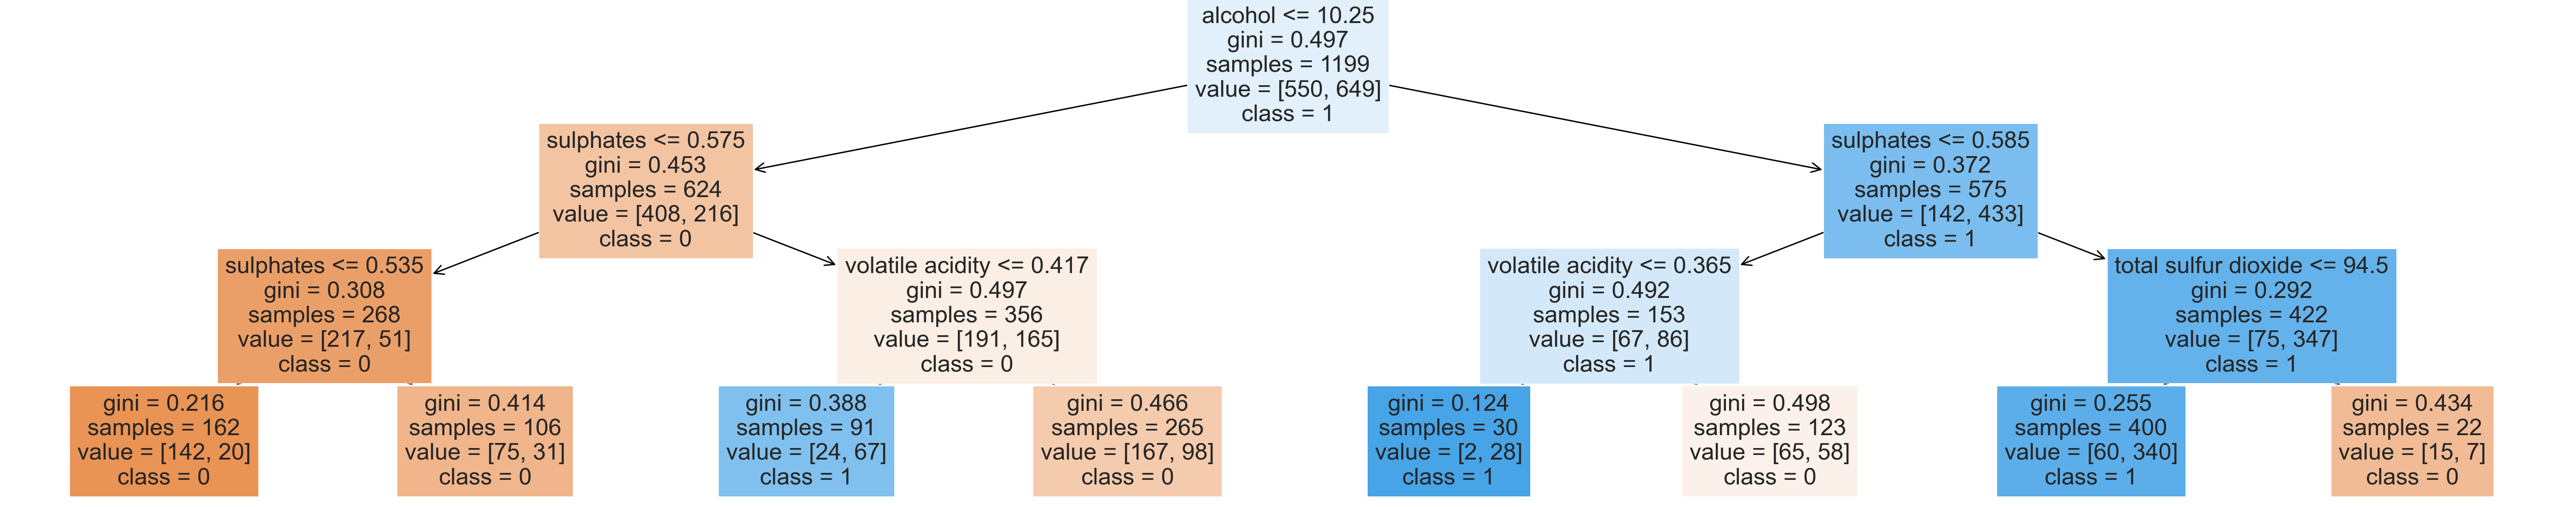

In [257]:
y = pd.DataFrame(winedata['grade'])
X = pd.DataFrame(winedata[['alcohol', 'sulphates', 'citric acid', 'residual sugar', 'density', 'total sulfur dioxide', 'volatile acidity']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 400)

dectree = DecisionTreeClassifier(max_depth = 3)  
dectree.fit(X_train, y_train)                    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(100, 20))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

# Conclusion
## All single variables compared with quality have similar classification accuracy
### However alcohol has the best accuracy out of all of the variables
### When combined according to their respective groups, the top 3 correlated variables give the best accuracy as compared to bottom 3 correlated variables or variables close to 0 correlation
### Accuracy is the best when all the variables are combined and compared with quality

# Logistic Regression
### Binary Classifier, but also split data into train and test dataset like Linear Regression
### Regression model for classification problems, has a sigmoid line in the graph
### Difference with Linear Regression: For regression problems, has a linear line in the graph

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [260]:
def printLogRegression(x,y = grade): #function to determine the accuracy of prediction using variables
    scaler = StandardScaler()
    scaler.fit(x)
    scaled_x = scaler.transform(x)
    
    x_train, x_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.25, random_state  = 365)
    
    reg = LogisticRegression()
    reg.fit(x_train,y_train)
    
    y_hat = reg.predict(x_test)
    
    acc = metrics.accuracy_score(y_hat,y_test)
    print('Accuracy',acc)
    print()
    
    result = pd.DataFrame(data = x.columns, columns = ['Features'])
    result['weight'] = np.transpose(reg.coef_)
    result['odds'] = np.exp(np.transpose(reg.coef_))
    print(result)
    print()
    
    cm = confusion_matrix(y_hat,y_test)
    
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    print(cm_df)

### Check accuracy for selected variables against quality
### We take top 3 correlated variables, top 3 bottom correlated variables and 3 variables close to 0 correlation

In [261]:
printLogRegression(pd.DataFrame(winedata['alcohol']) ) # top 3 correlated variable

Accuracy 0.71

  Features    weight     odds
0  alcohol  1.098976  3.00109

          Predicted 0  Predicted 1
Actual 0          139           59
Actual 1           57          145


In [262]:
printLogRegression(pd.DataFrame(winedata['citric acid'])) # top 3 correlated variable

Accuracy 0.5675

      Features    weight      odds
0  citric acid  0.308645  1.361579

          Predicted 0  Predicted 1
Actual 0           92           69
Actual 1          104          135


In [263]:
printLogRegression(pd.DataFrame(winedata['sulphates'])) # top 3 correlated variable

Accuracy 0.6475

    Features    weight      odds
0  sulphates  0.552923  1.738326

          Predicted 0  Predicted 1
Actual 0          115           60
Actual 1           81          144


In [264]:
printLogRegression(pd.DataFrame(winedata['volatile acidity']) ) #bottom 3 correlated variable

Accuracy 0.6475

           Features    weight      odds
0  volatile acidity -0.709041  0.492116

          Predicted 0  Predicted 1
Actual 0          115           60
Actual 1           81          144


In [265]:
printLogRegression(pd.DataFrame(winedata['total sulfur dioxide'])) # bottom 3 correlated variable

Accuracy 0.6125

               Features    weight      odds
0  total sulfur dioxide -0.470279  0.624828

          Predicted 0  Predicted 1
Actual 0           74           33
Actual 1          122          171


In [266]:
printLogRegression(pd.DataFrame(winedata['residual sugar']) ) #variable close to 0 correlation

Accuracy 0.5

         Features    weight      odds
0  residual sugar -0.041909  0.958957

          Predicted 0  Predicted 1
Actual 0            0            4
Actual 1          196          200


In [271]:
printLogRegression(pd.DataFrame(winedata['free sulfur dioxide']) ) #variable close to 0 correlation

Accuracy 0.5375

              Features    weight      odds
0  free sulfur dioxide -0.106971  0.898552

          Predicted 0  Predicted 1
Actual 0           20            9
Actual 1          176          195


In [272]:
printLogRegression(pd.DataFrame(winedata['pH']) ) #variable close to 0 correlation

Accuracy 0.51

  Features    weight      odds
0       pH  0.008982  1.009022

          Predicted 0  Predicted 1
Actual 0            0            0
Actual 1          196          204


### Next, compare multi variate variables in groups against quality

In [267]:
printLogRegression(pd.DataFrame(winedata[['alcohol', 'citric acid', 'sulphates']]) ) #top 3 correlated variables

Accuracy 0.725

      Features    weight      odds
0      alcohol  1.062510  2.893624
1  citric acid  0.117183  1.124325
2    sulphates  0.406875  1.502116

          Predicted 0  Predicted 1
Actual 0          142           56
Actual 1           54          148


In [268]:
printLogRegression(pd.DataFrame(winedata[['volatile acidity', 'total sulfur dioxide', 'density']]) ) #bottom 3 correlated variables

Accuracy 0.6975

               Features    weight      odds
0      volatile acidity -0.703610  0.494796
1  total sulfur dioxide -0.435325  0.647054
2               density -0.351905  0.703347

          Predicted 0  Predicted 1
Actual 0          118           43
Actual 1           78          161


In [269]:
printLogRegression(pd.DataFrame(winedata[['residual sugar', 'free sulfur dioxide', 'pH']]) ) #3 varibles within 0 correlation

Accuracy 0.525

              Features    weight      odds
0       residual sugar -0.021417  0.978811
1  free sulfur dioxide -0.104855  0.900455
2                   pH  0.018121  1.018286

          Predicted 0  Predicted 1
Actual 0           16           10
Actual 1          180          194


### Finally, compare all of the variables against quality

In [270]:
# All variables compared to quality
x = winedata.drop(['grade', 'quality'], axis =1 )
y = winedata['grade']

scaler = StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.2, random_state  = 365)

reg = LogisticRegression()
reg.fit(x_train,y_train)

y_hat = reg.predict(x_test)

acc = metrics.accuracy_score(y_hat,y_test)
print('Accuracy: ' , acc)
print()


result = pd.DataFrame(data = x.columns, columns = ['Features'])
result['weight'] = np.transpose(reg.coef_)
result['odds'] = np.exp(np.transpose(reg.coef_))
print(result)
print()

cm = confusion_matrix(y_hat,y_test)

cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
print(cm_df)

Accuracy:  0.759375

                Features    weight      odds
0          fixed acidity  0.228456  1.256658
1       volatile acidity -0.555184  0.573967
2            citric acid -0.227309  0.796675
3         residual sugar  0.047617  1.048768
4              chlorides -0.178091  0.836866
5    free sulfur dioxide  0.235359  1.265363
6   total sulfur dioxide -0.491930  0.611445
7                density -0.130978  0.877237
8                     pH -0.062986  0.938957
9              sulphates  0.442252  1.556207
10               alcohol  0.914452  2.495407

          Predicted 0  Predicted 1
Actual 0          119           39
Actual 1           38          124


## Conclusion:

### High or bottom correlated variables can predict the wine quality accurately, but variables close to 0 correlation cannot predict wine quality accurately.

### Need to use all of the variables and compare against quality to get a higher accuracy

# References
### https://www.kaggle.com/abolarinbukola/logistic-regression-wine-quality-92
### https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Logistic-Regression-Theory-988/#:~:text=Logistic%20Regression%20the%20Theory&text=%22Regression%22%20is%20an%20historic%20part,%2C%20good%20or%20bad%20etc..